In [1]:
import pandas as pd
import matplotlib.pyplot as plt

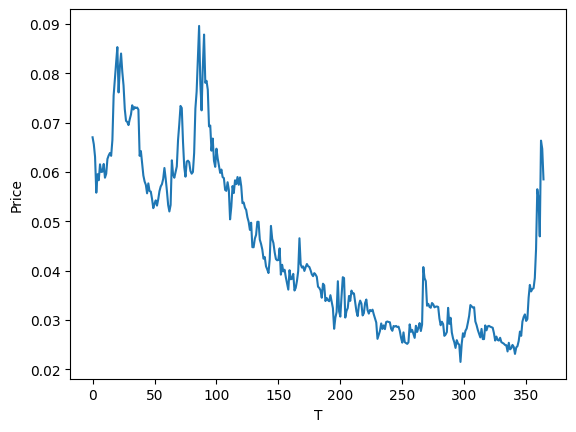

In [2]:
price = pd.read_csv("POKT Historical Price.csv").sort_values(by='Date')['Adj Close']
price.plot(kind='line')
plt.ylabel("Price")
plt.xlabel("T")
plt.show()

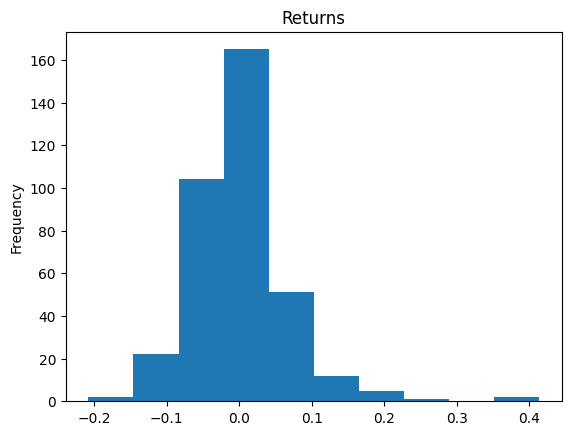

In [3]:
returns = price.pct_change()
returns.plot(kind='hist')
plt.title("Returns")
plt.show()

In [4]:
print(returns.mean())
print(returns.std())
print(returns.skew())
print(returns.kurtosis())

0.00166027149481152
0.06562764398482432
1.6116881741915297
8.526026443263422


In [5]:
print(returns.mean() - .5 * returns.std()**2)

-0.0004932223326879039


In [6]:
print(returns.mean() * 2 - .5 * returns.std()**2)

0.001167049162123616


In [7]:
returns.mean() * 2

0.00332054298962304

In [8]:
price.mean()

0.04405348493150684

In [9]:
price.std()

0.01657532621056741

<Axes: ylabel='Density'>

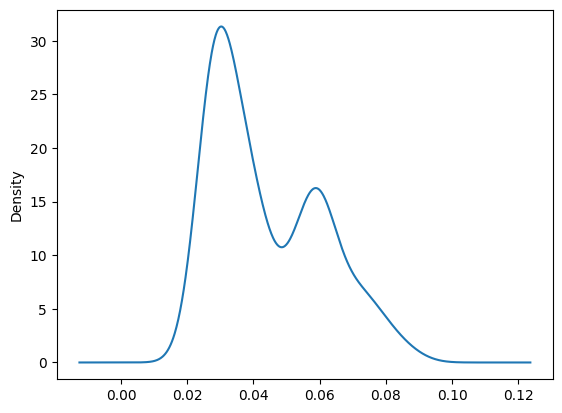

In [10]:
price.plot(kind='density')

In [11]:
from scipy.stats import lognorm

In [12]:
pars = lognorm.fit(price)

In [13]:
type(price)

pandas.core.series.Series

In [14]:
fitted = lognorm.rvs(pars[0], pars[1], pars[2], size = len(price))

(array([228.,  96.,  20.,   9.,   7.,   1.,   3.,   0.,   0.,   1.]),
 array([0.02214857, 0.04339864, 0.06464871, 0.08589879, 0.10714886,
        0.12839893, 0.14964901, 0.17089908, 0.19214915, 0.21339923,
        0.2346493 ]),
 <BarContainer object of 10 artists>)

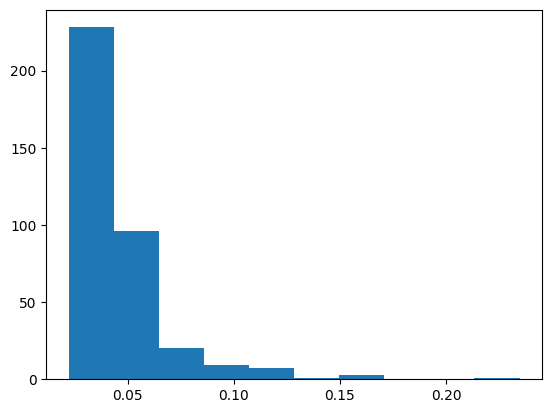

In [15]:
plt.hist(fitted)

<Axes: ylabel='Frequency'>

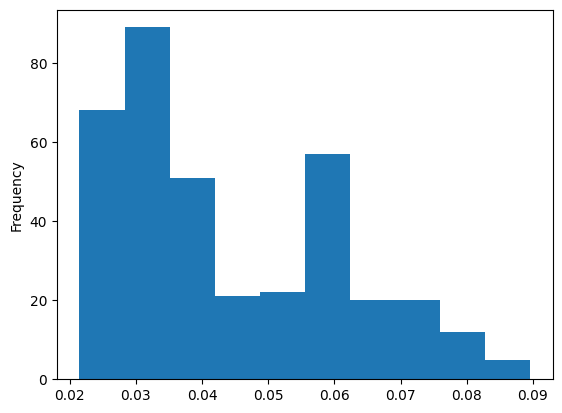

In [16]:
price.plot(kind='hist')

In [17]:
pars

(0.7783747227434171, 0.020085377713065667, 0.01822913696973913)

In [18]:
mu_p = price.mean()
std_p = price.std()
import numpy as np

In [19]:
std = ( np.log ( (std_p/mu_p)**2  + 1 ))**(0.5)
mu = np.log(mu_p) - 0.5 * std**2

In [20]:
std

0.3638713191401966

In [21]:
mu

-3.1885519850880812

In [22]:
(std_p/mu_p)**2

0.14156752161361613

In [23]:
_ + 1

1.141567521613616

In [24]:
np.log(_)

0.13240233689282682

In [25]:
_**(0.5)

0.3638713191401966

In [26]:
np.log((std_p/mu_p)**2)

-1.9549784911666614

In [27]:
(std_p/mu_p)**2

0.14156752161361613

In [28]:
np.exp(mu + 0.5*(std)**2)

0.044053484931506834

In [29]:
price.mean()

0.04405348493150684

In [30]:
np.floor(1 / np.random.exponential(1, size = 100))

array([ 11.,   1.,   2.,   0.,   2.,  19.,   1.,   1.,   0.,   0.,   2.,
         0.,   0.,   0.,   3.,   2.,   1.,   0.,   0.,   1.,   4.,   0.,
         0.,   1.,   1.,   1.,   0.,   1.,   2.,   1.,   0., 124.,   0.,
         1.,   1.,   1.,   1.,   9.,   1.,   0.,   2.,   0.,   0.,   2.,
         1.,   5.,   1.,   9.,   4.,   1.,   0.,   4.,   0.,  20.,   2.,
         2.,   0.,   0.,   1.,   1.,   1.,   1.,   0.,   8.,   5.,   0.,
         0.,   1.,   2.,   1.,   3.,   2.,   3.,   1.,   1.,   0.,   1.,
         0.,   1.,   1.,   6.,   1.,   0.,   0.,   0.,   1.,   1.,   0.,
        40.,   0.,   2.,   0.,   0.,   9.,   0.,   7.,   0.,   1.,   0.,
         6.])

(array([96.,  2.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  0. ,  12.4,  24.8,  37.2,  49.6,  62. ,  74.4,  86.8,  99.2,
        111.6, 124. ]),
 <BarContainer object of 10 artists>)

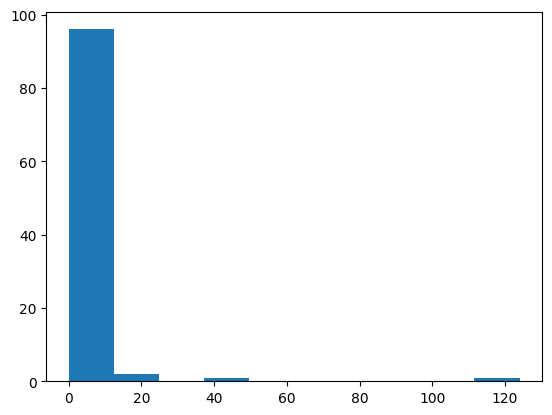

In [31]:
plt.hist(_)

In [32]:
np.floor(1/np.random.exponential(1, size = 100))

array([  0.,  22., 104.,   0.,   0.,   6.,   0.,   0.,   0.,   5.,  10.,
         0.,   4.,   0.,   9.,   0.,   0.,   3.,   0.,   2.,   1.,   0.,
         4.,  78.,   1.,   2.,   0.,   1.,   1.,   0.,   1.,   4.,   0.,
        14.,   0.,   4.,   1.,   0.,   0.,  31.,   1.,   2.,   2.,   0.,
         2.,   0.,   0.,   4.,   3.,   1.,   0.,   3.,   0.,   0.,   0.,
         1.,   0.,   0.,   0.,   0.,   1.,   9.,  12.,   3.,   1.,   1.,
         1.,   7.,   0.,   0.,   2.,  16.,   0.,   0.,   1.,  26.,   2.,
         0.,   0.,   0.,  21.,   0.,   0.,   0.,   5.,   0.,   3.,   1.,
         4.,  12.,  24.,   0.,   0.,   2.,   9.,   3.,   1.,   4.,   3.,
         0.])

In [33]:
def sig(mu, mu_p = 0.04405348493150684):
    return np.sqrt ( 2 * (np.log(mu_p) - mu) )

In [34]:
sig(-8)

3.1233473016487716

In [35]:
sig(-5)

1.937859222626005

In [36]:
sig(-20)

5.80993101221664

In [37]:
from scipy.stats import gaussian_kde

In [167]:
kde_oracle_returns = gaussian_kde(returns[1:])

In [126]:
kde_oracle_returns = gaussian_kde(returns[1:].sort_values())

In [39]:
import dill

In [41]:
with open('../data/kde_oracle_returns.pkl', 'wb') as file:
    dill.dump(kde_oracle_returns, file)

In [42]:
with open('../data/kde_oracle_returns.pkl', 'rb') as file:
    bobo = dill.load(file)

In [69]:
bobo.resample(1)[0][0]

0.008767816538091755

In [65]:
m = bobo.resample(1, 42)[0]
m

array([0.41124106])

In [66]:
all

array([ 2.14102004e-02,  1.03642881e-01,  7.75348274e-02,  4.35884035e-02,
       -2.52332206e-02, -4.03971668e-02,  8.25940700e-02, -3.97594862e-02,
       -4.75762006e-02,  4.24506951e-01, -4.21798477e-02,  9.94125322e-02,
        7.98053774e-02, -4.49876800e-02, -1.47363424e-01, -1.81028260e-02,
        3.27728084e-02, -2.16624528e-02, -7.29006595e-02, -6.64132171e-03,
        1.65131102e-01, -2.75268215e-02, -3.01565953e-02, -8.39921735e-02,
        4.22249081e-02,  1.14274616e-02, -5.35276277e-02,  9.54776169e-02,
       -2.80396900e-02, -1.05646198e-01, -6.67199506e-02,  2.83057884e-02,
        1.32887832e-02,  2.52475924e-01,  2.94872605e-02,  5.55253728e-02,
        8.34142164e-02, -1.79606838e-01, -6.54707362e-02, -3.85309927e-02,
        8.81967374e-03, -2.27760559e-02, -3.38526319e-02, -6.10973127e-02,
       -6.07278793e-03,  3.64275330e-02, -2.57063828e-02,  2.13300435e-02,
        1.42491375e-01, -8.07936075e-02, -3.58068941e-02, -1.66989088e-02,
       -4.58058506e-02,  

In [169]:
kde_oracle_returns.covariance_factor()

0.30745369958511376

In [170]:
kde_oracle_returns.set_bandwidth(1)

In [171]:
kde_oracle_returns.covariance_factor()

1

In [77]:
x = np.linspace(min(returns[1:]), max(returns[1:]), num = 1000)

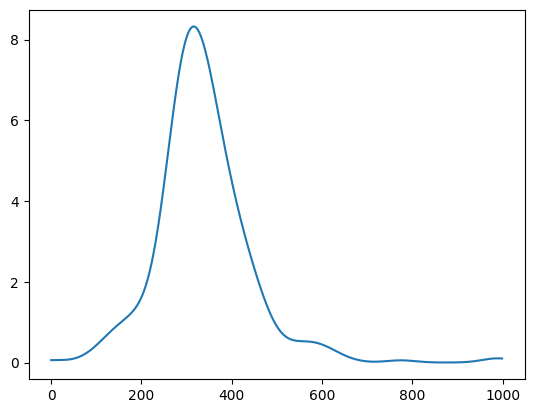

In [79]:
plt.plot(kde_oracle_returns.evaluate(x))

In [90]:
kde_oracle_returns.set_bandwidth(0.01)

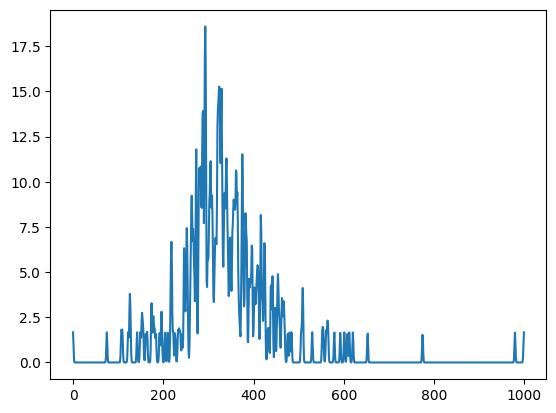

In [91]:
plt.plot(kde_oracle_returns.evaluate(x))

(array([  8.,  62., 274., 470., 123.,  29.,  19.,   5.,   0.,  10.]),
 array([-0.20810811, -0.14594135, -0.0837746 , -0.02160784,  0.04055892,
         0.10272568,  0.16489244,  0.22705919,  0.28922595,  0.35139271,
         0.41355947]),
 <BarContainer object of 10 artists>)

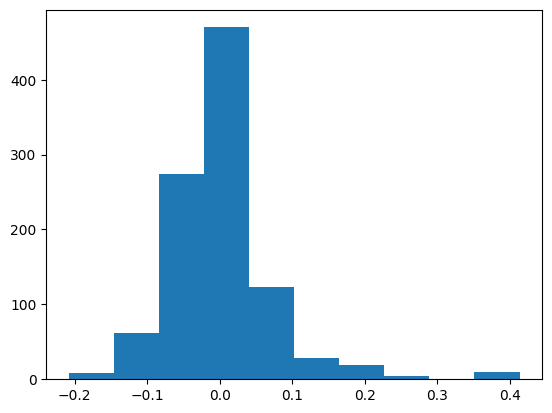

In [165]:
kde_oracle_returns.set_bandwidth(0.00000005)
plt.hist(kde_oracle_returns.resample(1000, seed=42)[0])

(array([  4.,  20., 101., 216., 276., 227., 111.,  35.,   8.,   2.]),
 array([-2.13540882, -1.6708808 , -1.20635278, -0.74182475, -0.27729673,
         0.18723129,  0.65175931,  1.11628733,  1.58081535,  2.04534337,
         2.50987139]),
 <BarContainer object of 10 artists>)

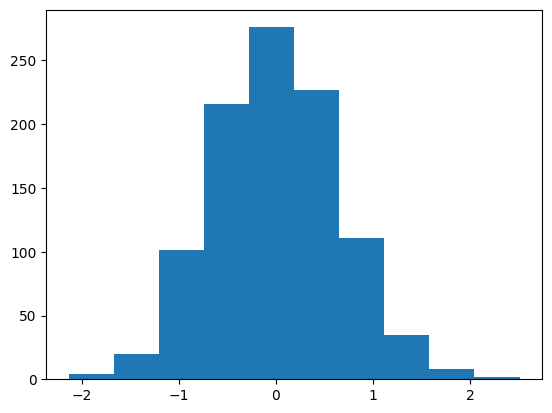

In [151]:
kde_oracle_returns.set_bandwidth(10)
plt.hist(kde_oracle_returns.resample(1000, seed=42)[0])

(array([  8.,  46., 231., 469., 177.,  36.,  17.,   6.,   0.,  10.]),
 array([-0.22461772, -0.16012676, -0.0956358 , -0.03114483,  0.03334613,
         0.0978371 ,  0.16232806,  0.22681903,  0.29130999,  0.35580096,
         0.42029192]),
 <BarContainer object of 10 artists>)

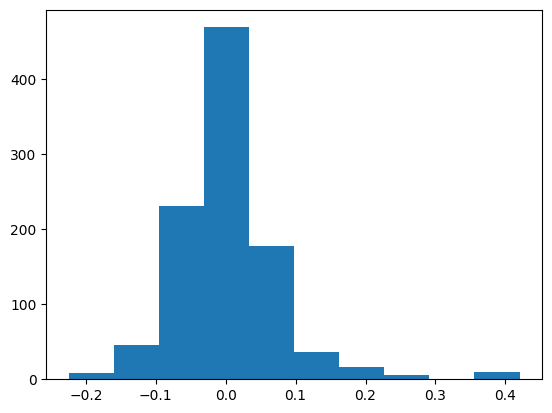

In [150]:
kde_oracle_returns.set_bandwidth(0.30745369958511376)
plt.hist(kde_oracle_returns.resample(1000, seed=42)[0])

In [130]:
w_1 = range(1, len(returns[1:])+1)

In [139]:
w_1 = np.ones(len(returns[1:])) * 1/len(returns[1:])

In [140]:
sum(w_1)

0.999999999999997

In [141]:
w1_kde_oracle_returns = gaussian_kde(returns[1:].sort_values(), weights = w_1)

937

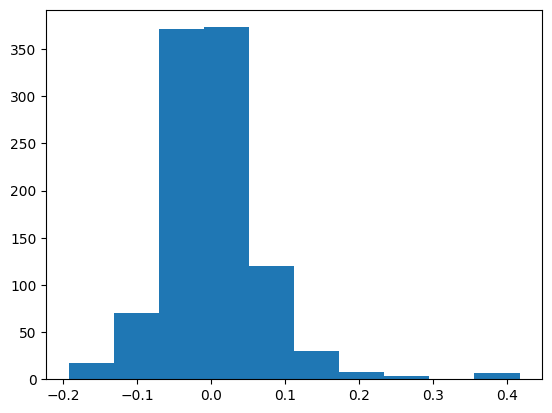

In [142]:
plt.hist(w1_kde_oracle_returns.resample(1000, seed=42)[0])
np.count_nonzero(small < 0.1)

In [133]:
returns[1:].sort_values()

204   -0.208108
199   -0.161478
361   -0.141566
297   -0.140066
270   -0.132124
         ...   
287    0.177771
198    0.198050
359    0.273818
267    0.401219
362    0.413559
Name: Adj Close, Length: 364, dtype: float64

In [143]:
ra_kde = gaussian_kde(returns[1:], weights = w_1)

(array([  8.,  46., 231., 469., 177.,  36.,  17.,   6.,   0.,  10.]),
 array([-0.22461772, -0.16012676, -0.0956358 , -0.03114483,  0.03334613,
         0.0978371 ,  0.16232806,  0.22681903,  0.29130999,  0.35580096,
         0.42029192]),
 <BarContainer object of 10 artists>)

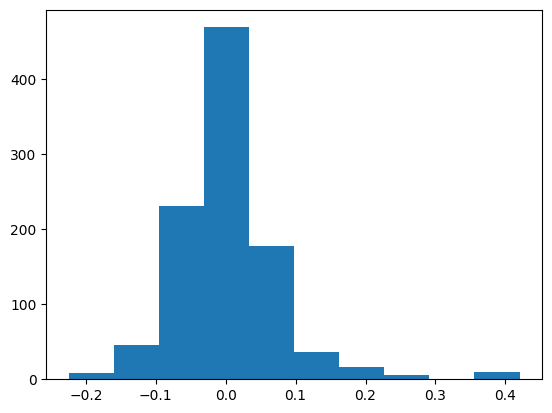

In [144]:
plt.hist(ra_kde.resample(1000, seed=42)[0])